In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import StandardScaler

### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [6]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep = '\t', index_col = 0)

In [8]:
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3076 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3076 non-null   object
 1   rating             3076 non-null   int64 
 2   effectiveness      3076 non-null   object
 3   sideEffects        3076 non-null   object
 4   condition          3075 non-null   object
 5   benefitsReview     3076 non-null   object
 6   sideEffectsReview  3074 non-null   object
 7   commentsReview     3068 non-null   object
dtypes: int64(1), object(7)
memory usage: 216.3+ KB


In [9]:
df['benefitsReview'].nunique()

3031

In [10]:
df['commentsReview'].nunique()

3046

In [11]:
df['condition'].nunique()

1426

In [13]:
df['effectiveness'].nunique()
# válido

5

In [15]:
df['sideEffects'].nunique()
# válido

5

In [16]:
df['sideEffectsReview'].nunique()

2813

In [17]:
df['urlDrugName'].nunique()

502

In [19]:
df.drop(columns = ['benefitsReview', 'commentsReview', 'condition', 'sideEffectsReview', 'urlDrugName'], inplace = True)

#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [22]:
df = pd.get_dummies(data = df, columns = ['effectiveness', 'sideEffects']).astype(int)

In [23]:
df.head()

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
2202,4,0,1,0,0,0,0,1,0,0,0
3117,1,0,1,0,0,0,0,0,0,0,1
1146,10,0,1,0,0,0,0,0,0,1,0
3947,3,0,0,0,1,0,0,1,0,0,0
1951,2,0,0,0,1,0,0,0,0,0,1


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

#### Genera el K Means 

In [71]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42, n_init=10))
])

param_dist = {
    'kmeans__n_clusters': range(2, 21)
}

In [72]:
search = RandomizedSearchCV(
    estimator = pipeline, 
    param_distributions=param_dist, 
    n_iter = 10,
    cv=2
)

search.fit(df)
results = pd.DataFrame(search.cv_results_)
results = results.sort_values(by='param_kmeans__n_clusters')

In [79]:
optimal_k = search.best_params_['kmeans__n_clusters']
optimal_k

17

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [ ]:
results
# Vemos los datos de los diferentes clusters que ha escogido el randomizedsearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kmeans__n_clusters,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
6,0.039488,0.006625,0.003230,7.987022e-06,3,{'kmeans__n_clusters': 3},-11441.039844,-12390.744819,-11915.892332,474.852488,10
9,0.037643,0.001273,0.003136,2.307892e-04,5,{'kmeans__n_clusters': 5},-7926.381356,-8933.233633,-8429.807494,503.426139,9
0,0.062549,0.014294,0.004026,3.553629e-04,7,{'kmeans__n_clusters': 7},-5868.237758,-6002.016799,-5935.127279,66.889520,8
2,0.038217,0.000668,0.003658,1.575947e-04,10,{'kmeans__n_clusters': 10},-3217.179746,-3390.634542,-3303.907144,86.727398,7
8,0.042485,0.003193,0.003305,2.384186e-07,12,{'kmeans__n_clusters': 12},-2467.474563,-2572.775147,-2520.124855,52.650292,6
7,0.041953,0.000949,0.003688,1.670122e-04,13,{'kmeans__n_clusters': 13},-2145.763850,-2225.461168,-2185.612509,39.848659,5
3,0.044928,0.000948,0.004414,1.299739e-03,14,{'kmeans__n_clusters': 14},-1903.560652,-2003.972915,-1953.766783,50.206132,4
1,0.044466,0.000502,0.003336,1.883507e-04,15,{'kmeans__n_clusters': 15},-1626.342990,-1702.180546,-1664.261768,37.918778,3
5,0.045811,0.001581,0.003436,5.390644e-04,16,{'kmeans__n_clusters': 16},-1395.843117,-1480.692293,-1438.267705,42.424588,2
4,0.045336,0.002004,0.003682,2.886057e-04,17,{'kmeans__n_clusters': 17},-1132.903840,-1285.295252,-1209.099546,76.195706,1


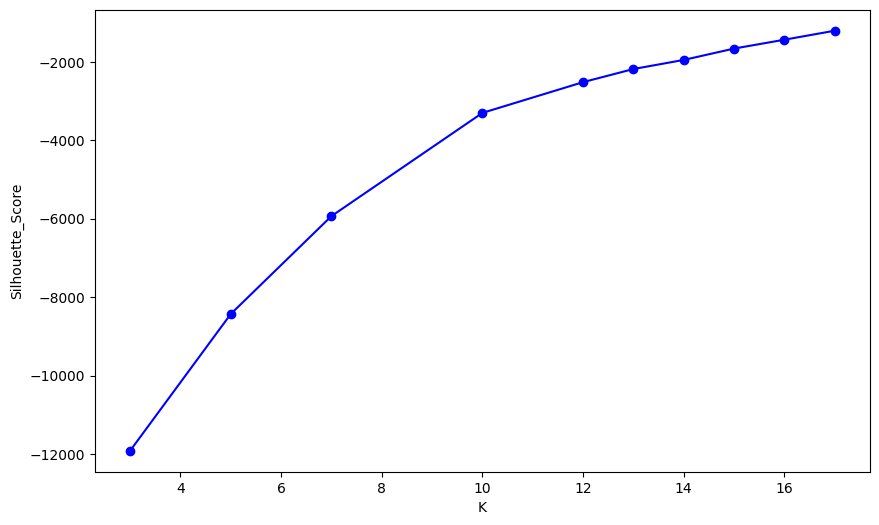

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results['param_kmeans__n_clusters'], 
         results['mean_test_score'], 
         'bo-')
plt.xlabel('K')
plt.ylabel('Silhouette_Score')
plt.show()